### Context
Our world population is expected to grow from 7.3 billion today to 9.7 billion in the year 2050. Finding solutions for feeding the growing world population has become a hot topic for food and agriculture organizations, entrepreneurs and philanthropists. These solutions range from changing the way we grow our food to changing the way we eat. To make things harder, the world's climate is changing and it is both affecting and affected by the way we grow our food – agriculture.
This dataset provides an insight on our worldwide food production - focusing on a comparison between food produced for human consumption and feed produced for animals.

### Content
The Food and Agriculture Organization of the United Nations provides free access to food and agriculture data for over 245 countries and territories, from the year 1961 to the most recent update (depends on the dataset). One dataset from the FAO's database is the Food Balance Sheets. It presents a comprehensive picture of the pattern of a country's food supply during a specified reference period, the last time an update was loaded to the FAO database was in 2013. The food balance sheet shows for each food item the sources of supply and its utilization. This chunk of the dataset is focused on two utilizations of each food item available:

### Food - refers to the total amount of the food item available as human food during the reference period.
Feed - refers to the quantity of the food item available for feeding to the livestock and poultry during the reference period.
Acknowledgements
This dataset was meticulously gathered, organized and published by the Food and Agriculture Organization of the United Nations.

### Possible questions to answer:
1. Can you find interesting outliers in the data?
2. What are the fastest growing countries in terms of food production\consumption?
3. Compare between food and feed consumption.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\sunil pc\Jupyter_files\IIIT-B-Material\DATrack10-Plotly\fao.csv', encoding = 'iso-8859-1')
df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


## 1. Analysing by Country

### 1.1 Plotting production of all countries over all years

In [3]:
# Grouping on country and summing produce of all types

grouped_df = df.groupby(by = 'Area').sum()
grouped_df.reset_index(level = 0, inplace= True)
grouped_df.head()

,Area,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,166,224695,430576,2817.02,5619.93,9481.0,9414.0,9194.0,10170.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007
1,Albania,369,331693,641941,5061.45,2480.91,1706.0,1749.0,1767.0,1889.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271
2,Algeria,496,333506,645946,3475.72,205.84,7488.0,7235.0,6861.0,7255.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161
3,Angola,763,295092,566163,-1220.80,1947.83,4834.0,4775.0,5240.0,5286.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639
4,Antigua and Barbuda,936,315344,606541,1996.02,-7230.60,92.0,94.0,105.0,95.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119


In [4]:
# Dropping lat long etc and keeping only year colums as only they are needed for plotting

countriesyears = grouped_df.drop(['Area Code','Item Code','Element Code','latitude','longitude'], axis=1)
countriesyears.head()

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007
1,Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271
2,Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161
3,Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639
4,Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119


In [5]:
# Using melt to unpivot the dataframe and get all the different year values as row values for plotting

countriesyears1 = countriesyears.melt(id_vars = 'Area')
countriesyears1.head()

,Area,variable,value
0,Afghanistan,Y1961,9481.0
1,Albania,Y1961,1706.0
2,Algeria,Y1961,7488.0
3,Angola,Y1961,4834.0
4,Antigua and Barbuda,Y1961,92.0


In [6]:
countriesyears1.shape

(9222, 3)

In [7]:
year_list = grouped_df.columns[6:]

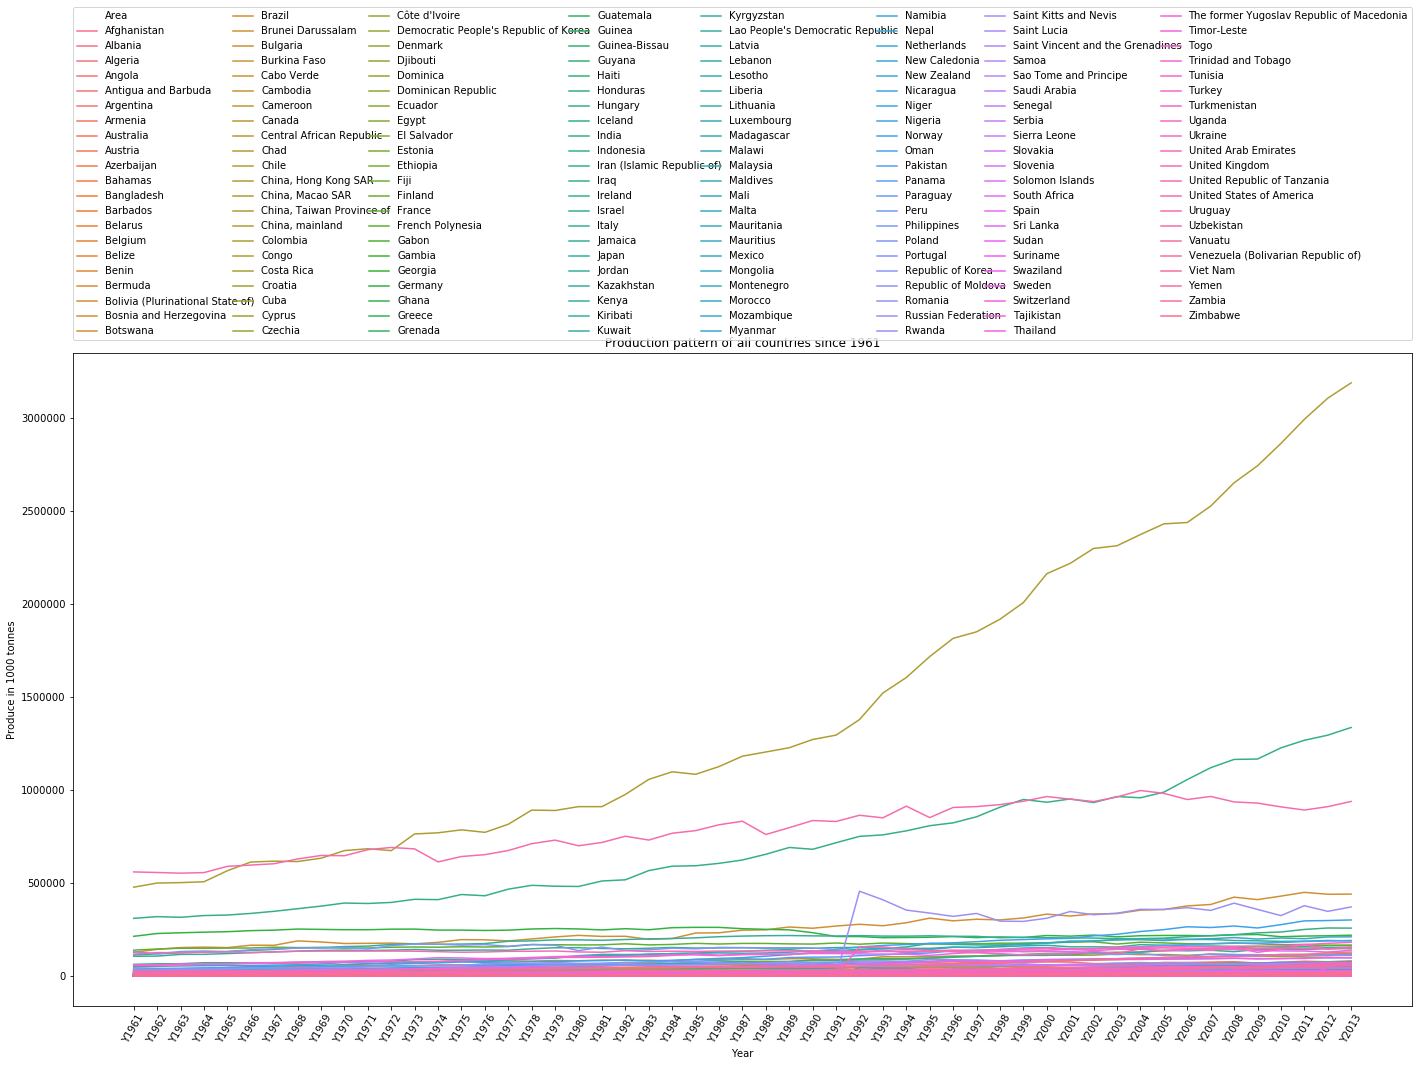

In [8]:
# Plotting produce of all countries over several years with legend on top

plt.figure(figsize=(24,12))
sns.lineplot(x = countriesyears1.variable, y = countriesyears1.value, hue = countriesyears1.Area, data = countriesyears1)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode="expand", borderaxespad=0.)
plt.ylabel('Produce in 1000 tonnes')
plt.xlabel('Year')
plt.title('Production pattern of all countries since 1961')
plt.show()

#### As we can see, above plot is not very clear and we are unable to make out the different countries because it is too cluttered, even the legend is very cluttered. So filtering only top 5 producucing countries and plotting them.

### 1.2 Plotting production of top 5 countries over all years

In [9]:
# Grouping by country for different years again for overall top 5 producing countries

countriesyears2 = countriesyears1.groupby('Area').sum()
countriesyears2 = countriesyears2.sort_values(by = 'value', ascending=False).head()
Top5ProducingCountries = countriesyears2.index
Top5ProducingCountries

Index(['China, mainland', 'United States of America', 'India', 'Brazil',
       'Germany'],
      dtype='object', name='Area')

In [10]:
# Creating a dataframe with only top 5 producing companies data

countriesyears3 = countriesyears1.loc[countriesyears1['Area'].isin(Top5ProducingCountries)]
countriesyears3.head()

,Area,variable,value
21,Brazil,Y1961,126501.0
35,"China, mainland",Y1961,477279.0
61,Germany,Y1961,212839.0
73,India,Y1961,309565.0
165,United States of America,Y1961,559347.0


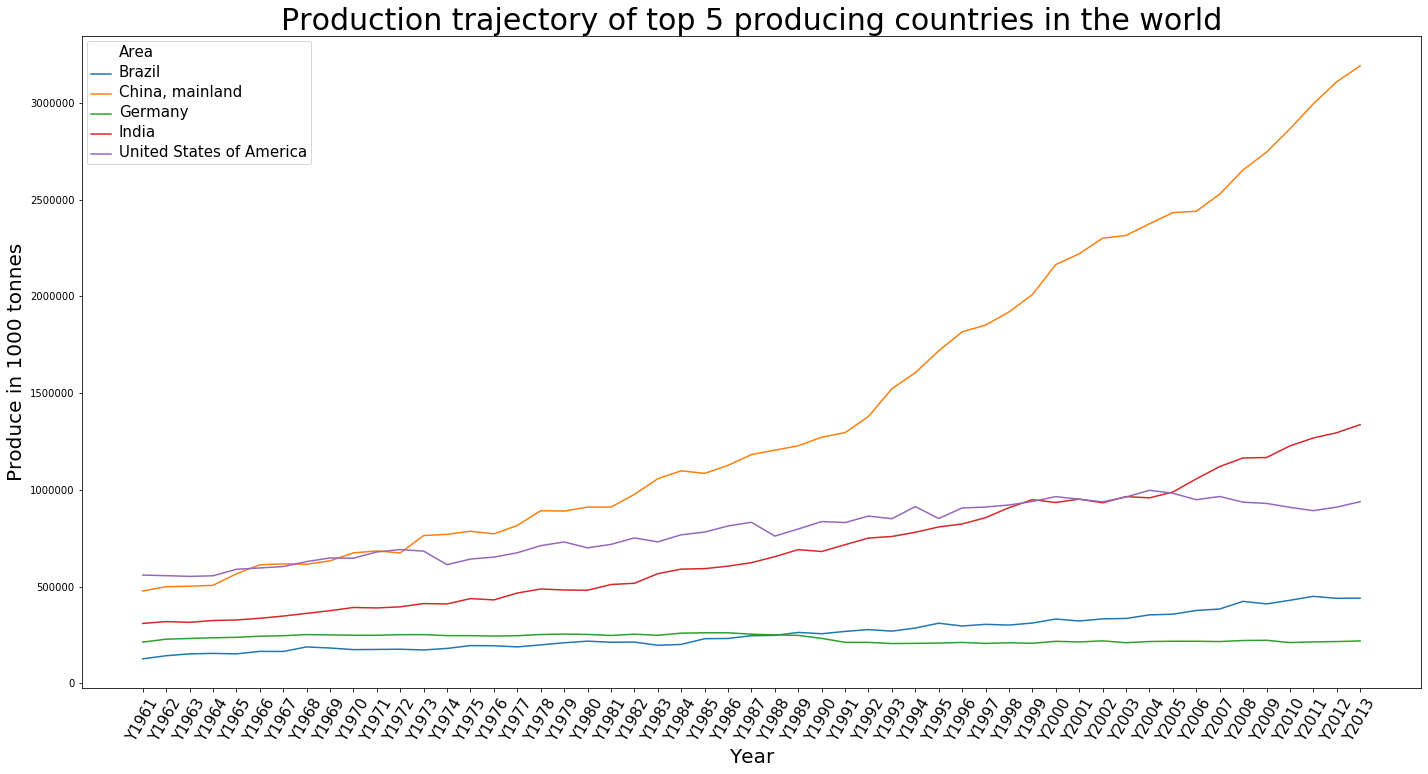

In [11]:
# Plotting top 5 producing countries data

plt.figure(figsize=(24,12))
ax = sns.lineplot(x = countriesyears3.variable, y = countriesyears3.value, hue = countriesyears3.Area, data = countriesyears3)
plt.xticks(np.arange(53), tuple(year_list), rotation=60, fontsize='15')
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.ylabel('Produce in 1000 tonnes', fontsize='20')
plt.xlabel('Year', fontsize='20')
plt.title('Production trajectory of top 5 producing countries in the world', fontsize='30')
plt.show()

#### China is the top food producer and it overtook the US for this position somewhere in 1965. The US was second largest food producer till a long time till India overtook it in about 1999. One interesting trend we notice here is that the food production of the US has not increased drastically over the years, unlike China and India. Brazil is currently at 4th place, having overtaken Germany.

#### We are already seeing a pattern here- developing countries have sharper increases in food production than developed countries.

#### One more insight is that China was almost following the global trend of increase in production till about 1990, after which its production shot up drastically, and the rate of production increase shot up sharply. 
##### Studies concluded that most of the rise in productivity in the early reform years was a result of institutional innovations, particularly the HRS, a policy that gave individual farmers control and income rights in agriculture. You can read more about China's production increase here-
http://www.fao.org/3/ag088e/ag088e03.htm

### 1.4 Investigating the food-feed ratio of top 5 producers

In [12]:
Top5FoodFeed = df.groupby(by=['Area','Element']).sum()
Top5FoodFeed.head()

Area Code  Item Code  Element Code  latitude  longitude  \
Area        Element                                                            
Afghanistan Feed            20      27169         55210    339.40     677.10   
            Food           146     197526        375366   2477.62    4942.83   
Albania     Feed            75      67296        138025   1028.75     504.25   
            Food           294     264397        503916   4032.70    1976.66   
Algeria     Feed            88      58945        121462    616.66      36.52   

                      Y1961   Y1962   Y1963   Y1964   Y1965  ...    Y2004  \
Area        Element                                          ...            
Afghanistan Feed      720.0   720.0   736.0   740.0   720.0  ...    704.0   
            Food     8761.0  8694.0  8458.0  9430.0  9753.0  ...  15838.0   
Albania     Feed       94.0   108.0   124.0   122.0    95.0  ...    990.0   
            Food     1612.0  1641.0  1643.0  1767.0  1789.0  ...   5647.0   
Algeria     Feed       83.0    94.0    63.0    98.0    84.0  ...   4575.0   

                       Y2005    Y2006    Y2007    Y2008    Y2009    Y2010  \
Area        Element                                                         
Afghanistan Feed      1184.0   1342.0   1392.0   1294.0   1616.0   1388.0   
            Food     16474.0  16975.0  17856.0  18087.0  19045.0  19642.0   
Albania     Feed       994.0   1047.0    959.0   1075.0   1134.0   1334.0   
            Food      5725.0   5864.0   5785.0   6093.0   6182.0   6573.0   
Algeria     Feed      4401.0   4599.0   4252.0   3436.0   4839.0   5804.0   

                       Y2011  Y2012  Y2013  
Area        Element                         
Afghanistan Feed      1192.0   1522   1536  
            Food     19908.0  21184  21471  
Albania     Feed      1334.0   1312   1319  
            Food      6780.0   6909   6952  
Algeria     Feed      7477.0   8549   8706  

[5 rows x 58 columns]

In [13]:
Top5FoodFeed = Top5FoodFeed.iloc[:, 5:].sum(axis=1)
Top5FoodFeed = Top5FoodFeed.loc[Top5FoodFeed.index.isin(Top5ProducingCountries, level='Area')]

In [14]:
Top5FoodFeed = pd.DataFrame(Top5FoodFeed)
Top5FoodFeed = Top5FoodFeed.reset_index()
Top5FoodFeed.rename(columns={0:'FoodFeed'}, inplace=True)
Top5FoodFeed

,Area,Element,FoodFeed
0,Brazil,Feed,4424383.0
1,Brazil,Food,9393856.0
2,"China, mainland",Feed,15525020.0
3,"China, mainland",Food,60723839.0
4,Germany,Feed,4322752.0
5,Germany,Food,7977690.0
6,India,Feed,1978871.0
7,India,Food,34570279.0
8,United States of America,Feed,15491984.0
9,United States of America,Food,26227192.0


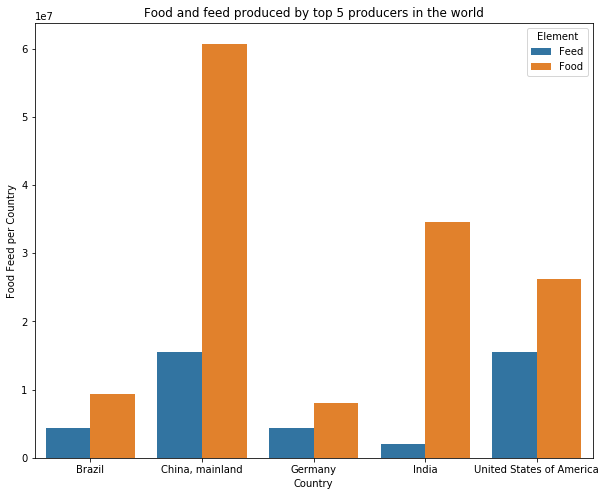

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=Top5FoodFeed['Area'], y=Top5FoodFeed['FoodFeed'], data=Top5FoodFeed, hue = Top5FoodFeed['Element'])
plt.xlabel('Country')
plt.ylabel('Food Feed per Country')
plt.title('Food and feed produced by top 5 producers in the world')
plt.show()

#### China and India have a huge difference between their food and feed production in particular.

## 3. Food Feed Analysis

### 3.1 Exploring total food and feed production

In [16]:
# Summing all countries and all items to food/feed level

FoodFeed = df.groupby('Element').sum()
FoodFeed.head()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Element,,,,,,,,,,,,,,,,,,,,,
Feed,500166,10654677,21802429,101415.48,66187.34,884314.0,913198.0,954852.0,972294.0,1006792.0,...,2265261.0,2231603.0,2216267.0,2253747.0,2366119.0,2279482.0,2300597.0,2455964.0,2423161,2608511
Food,2194111,47208904,90128976,337802.33,273029.96,2618297.0,2688434.0,2730772.0,2793351.0,2895741.0,...,8017541.0,8187739.0,8391566.0,8614041.0,8808645.0,8932409.0,9144475.0,9371838.0,9616184,9752737


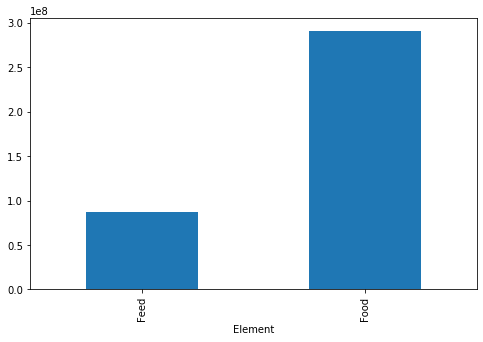

In [17]:
# Summing all the different years' food/feed production

FoodFeed1 = FoodFeed.iloc[:, 5:].sum(axis=1)
FoodFeed1.plot(kind='bar', figsize = (8,5))

#### The amount of food produced is much more than amount of feed produced. Huge difference between the two.

### 3.2 Increase in Food and Feed production over the years

In [18]:
# Percentage increase in food and feed production from 1961 to 2013

FoodFeed['Percent Increase'] = (((FoodFeed['Y2013'] - FoodFeed['Y1961'])/FoodFeed['Y1961'])*100).round(2)
FoodFeed

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Percent Increase
Element,,,,,,,,,,,,,,,,,,,,,
Feed,500166,10654677,21802429,101415.48,66187.34,884314.0,913198.0,954852.0,972294.0,1006792.0,...,2231603.0,2216267.0,2253747.0,2366119.0,2279482.0,2300597.0,2455964.0,2423161,2608511,194.98
Food,2194111,47208904,90128976,337802.33,273029.96,2618297.0,2688434.0,2730772.0,2793351.0,2895741.0,...,8187739.0,8391566.0,8614041.0,8808645.0,8932409.0,9144475.0,9371838.0,9616184,9752737,272.48


#### Worldwide production of Food for humans increased by 272% from 1961-2013. Production of Feed for livestock increased by 195% in the same period.

In [19]:
FoodFeed2 = FoodFeed.drop(['Area Code', 'Element Code', 'Item Code', 'latitude', 'longitude'], axis='columns').copy()
FoodFeed2 = FoodFeed2.reset_index()
FoodFeed2 = FoodFeed2.melt(id_vars = 'Element')
FoodFeed2.head()

,Element,variable,value
0,Feed,Y1961,884314.0
1,Food,Y1961,2618297.0
2,Feed,Y1962,913198.0
3,Food,Y1962,2688434.0
4,Feed,Y1963,954852.0


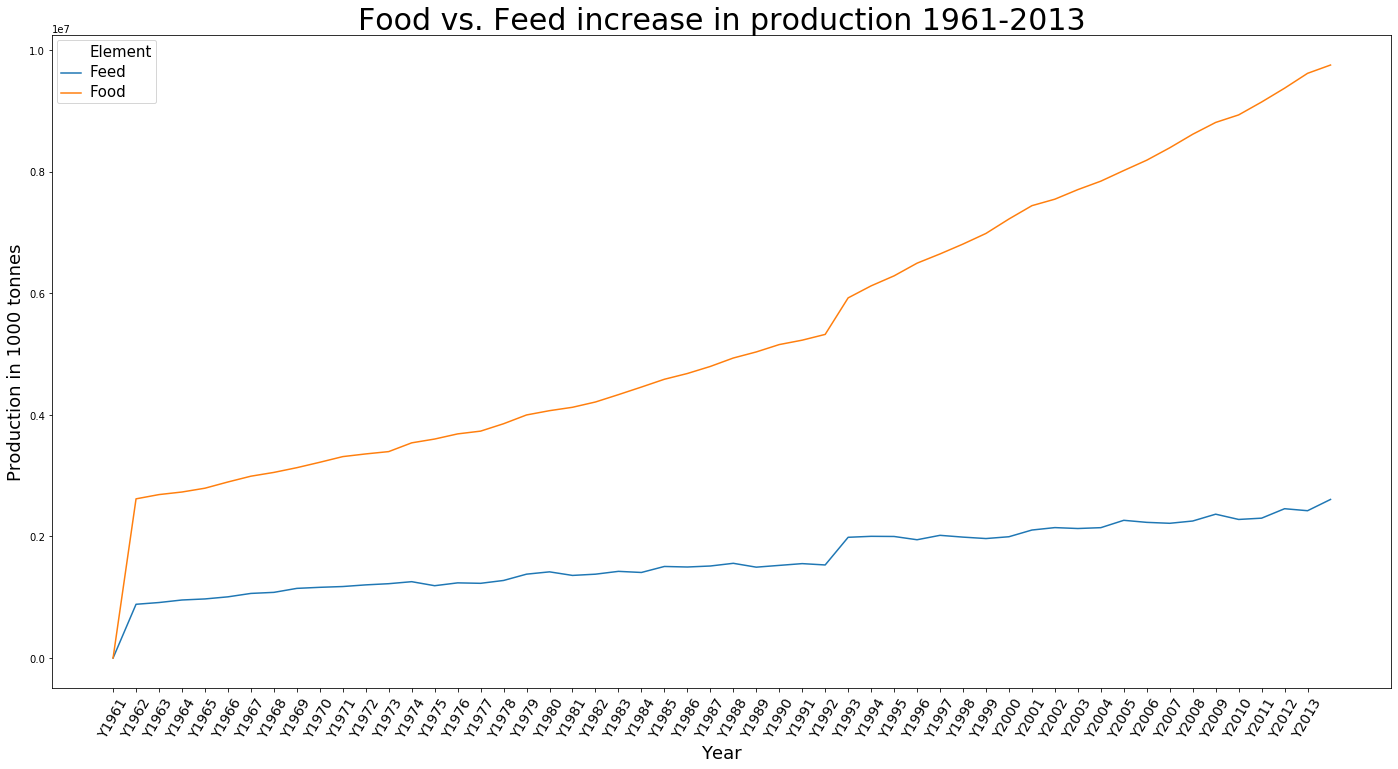

In [20]:
plt.figure(figsize=(24,12))
ax = sns.lineplot(x = FoodFeed2['variable'], hue=FoodFeed2['Element'], y=FoodFeed2['value'], data=FoodFeed2)
plt.xticks(np.arange(53), tuple(year_list), rotation=60, fontsize='14')
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.ylabel('Production in 1000 tonnes', fontsize='18')
plt.xlabel('Year', fontsize='18')
plt.title('Food vs. Feed increase in production 1961-2013', fontsize='30')
plt.show()

#### Food has seen a 272% increase in production and feed saw a 195% increase in production. We can also see a sharp spike in both food and feed production between 1991-1992. Checking that-

In [21]:
FoodFeed[['Y1990','Y1991','Y1992','Y1993']]

,Y1990,Y1991,Y1992,Y1993
Element,,,,
Feed,1552946.0,1531076.0,1986016.0,2002020.0
Food,5227856.0,5322549.0,5923283.0,6120920.0


#### As is evident, years 1991-1992 saw a sharp increase in production in food-feed. This is much more than the normal year-by-year increase for all other years as is evident from increase from 1990-1991 and from 1992-1993.

#### We can tie this back with the top 5 producing countries analysis above, and conclude that this spike is primarily due to increase in production in China.

## 3. Analysing dataset for items

### 3.1 Assigning a rank to each item based on its total production over the years

In [22]:
ItemPerYear = df.groupby(by=df['Item']).sum()
ItemPerYear.drop(['Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude'], axis='columns', inplace=True)
ItemPerYear.head(2)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,69924.0,72447.0,75105.0,77976.0,80127.0,83660.0,86095.0,89075.0,92729.0,97789.0,...,217392.0,222722.0,233310.0,244420.0,244373.0,243452.0,247414.0,256269.0,258895,260701
Animal fats,10359.0,10929.0,11116.0,11361.0,11469.0,11508.0,11974.0,12325.0,12263.0,12312.0,...,22781.0,22641.0,23314.0,23807.0,23818.0,23900.0,24267.0,24604.0,25137,25186


In [23]:
# Assigning a rank to each item based on total amount of item produced from 1961-2013

ItemPerYear['Total Produce'] = ItemPerYear.sum(axis='columns')
ItemPerYear['Item_Rank'] = ItemPerYear['Total Produce'].rank(ascending=False).astype(int)
ItemPerYear.head(2)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Total Produce,Item_Rank
Item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,69924.0,72447.0,75105.0,77976.0,80127.0,83660.0,86095.0,89075.0,92729.0,97789.0,...,233310.0,244420.0,244373.0,243452.0,247414.0,256269.0,258895,260701,8242864.0,12
Animal fats,10359.0,10929.0,11116.0,11361.0,11469.0,11508.0,11974.0,12325.0,12263.0,12312.0,...,23314.0,23807.0,23818.0,23900.0,24267.0,24604.0,25137,25186,906973.0,43


In [24]:
# Most produced food items top 10

Top10FoodItems = ItemPerYear.sort_values(by='Item_Rank').head(10)
Top10FoodItemslist = Top10FoodItems.index
Top10FoodItems.index

Index(['Cereals - Excluding Beer', 'Milk - Excluding Butter', 'Vegetables',
       'Starchy Roots', 'Maize and products', 'Wheat and products',
       'Vegetables, Other', 'Rice (Milled Equivalent)',
       'Fruits - Excluding Wine', 'Potatoes and products'],
      dtype='object', name='Item')

#### 'Cereals - Excluding Beer', 'Milk - Excluding Butter', 'Vegetables', 'Starchy Roots', 'Maize and products' were the top 5 most produced items worldwide. 

### 3.2 Production trajectory of top 10 most produced items

In [25]:
Top10FoodItems.head(2)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Total Produce,Item_Rank
Item,,,,,,,,,,,,,,,,,,,,,
Cereals - Excluding Beer,588894.0,611825.0,630487.0,651402.0,682604.0,708781.0,727698.0,747534.0,776142.0,803833.0,...,1678707.0,1706244.0,1778904.0,1737755.0,1750798.0,1804488.0,1808225,1902569,64884281.0,1
Milk - Excluding Butter,500986.0,503530.0,511170.0,518616.0,524636.0,536156.0,541360.0,555348.0,564908.0,560902.0,...,1229212.0,1262878.0,1283666.0,1305576.0,1336422.0,1370168.0,1413148,1423422,45014120.0,2


In [26]:
#Resetting index so we can have index as a column for melting the dataframe later
Top10FoodItems.reset_index(inplace=True)

#Dropping unnecessary columns
Top10FoodItems.drop(['Total Produce','Item_Rank'],axis='columns', inplace=True)

#Unpivoting the data for plotting
Top10FoodItems = Top10FoodItems.melt(id_vars='Item')

Top10FoodItems.head(2)

,Item,variable,value
0,Cereals - Excluding Beer,Y1961,588894.0
1,Milk - Excluding Butter,Y1961,500986.0


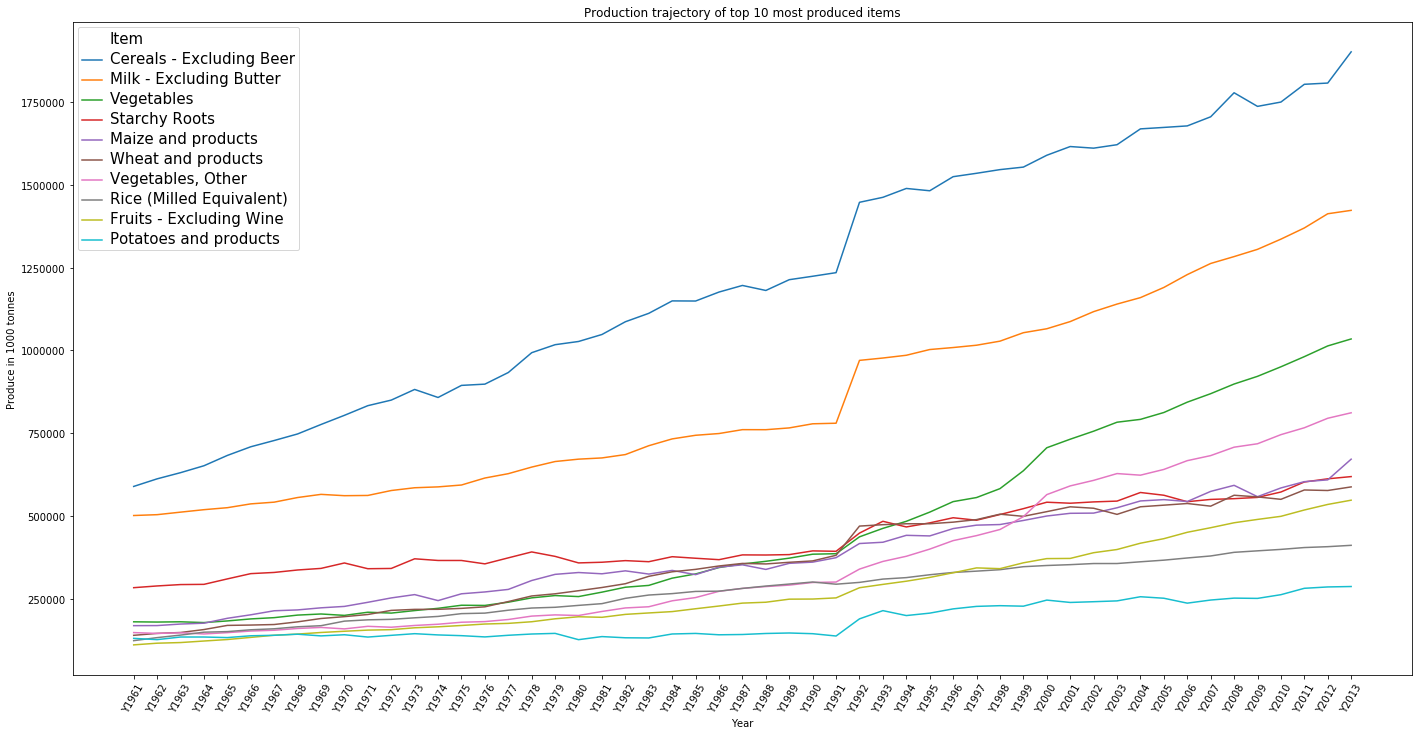

In [27]:
# Plotting produce of all items over several years with legend on top

plt.figure(figsize=(24,12))
ax = sns.lineplot(x=Top10FoodItems.variable, y=Top10FoodItems.value, data=Top10FoodItems, hue=Top10FoodItems.Item)
plt.xticks(np.arange(53), tuple(year_list), rotation=60)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title
plt.ylabel('Produce in 1000 tonnes')
plt.xlabel('Year')
plt.title('Production trajectory of top 10 most produced items')
plt.show()

### 3.3 Analysing the ratio of food-feed of top 10 most produced items

In [28]:
Top10FoodItemslist

Index(['Cereals - Excluding Beer', 'Milk - Excluding Butter', 'Vegetables',
       'Starchy Roots', 'Maize and products', 'Wheat and products',
       'Vegetables, Other', 'Rice (Milled Equivalent)',
       'Fruits - Excluding Wine', 'Potatoes and products'],
      dtype='object', name='Item')

In [29]:
# Creating a dataframe containing top 10 food items segregated by food and feed so we can plot it later

Top10 =  df.loc[df['Item'].isin(Top10FoodItemslist)].groupby(by=['Item','Element']).sum()
Top10.head(2)

Area Code  Item Code  Element Code  \
Item                     Element                                       
Cereals - Excluding Beer Feed         21753     502565        955133   
                         Food         21825     505470        894708   

                                  latitude  longitude     Y1961     Y1962  \
Item                     Element                                            
Cereals - Excluding Beer Feed      3365.16    2699.72  253905.0  260940.0   
                         Food      3376.99    2742.31  334989.0  350885.0   

                                     Y1963     Y1964     Y1965  ...     Y2004  \
Item                     Element                                ...             
Cereals - Excluding Beer Feed     269992.0  274227.0  297391.0  ...  750500.0   
                         Food     360495.0  377175.0  385213.0  ...  919231.0   

                                     Y2005     Y2006     Y2007     Y2008  \
Item                     Element                                           
Cereals - Excluding Beer Feed     745239.0  736469.0  754025.0  811491.0   
                         Food     928890.0  942238.0  952219.0  967413.0   

                                     Y2009     Y2010      Y2011    Y2012  \
Item                     Element                                           
Cereals - Excluding Beer Feed     764011.0  758205.0   801196.0   795691   
                         Food     973744.0  992593.0  1003292.0  1012534   

                                    Y2013  
Item                     Element           
Cereals - Excluding Beer Feed      873552  
                         Food     1029017  

[2 rows x 58 columns]

In [30]:
# Summing all years values for top 10 most produced items and resetting index so we can have index names as columns

Top10 = Top10.iloc[:, 5:].sum(axis='columns').reset_index()
Top10.head(2)

,Item,Element,0
0,Cereals - Excluding Beer,Feed,28480092.0
1,Cereals - Excluding Beer,Food,36404189.0


In [31]:
# Renaming the column 0 to values

Top10.rename(columns = {0:'Values'}, inplace=True)

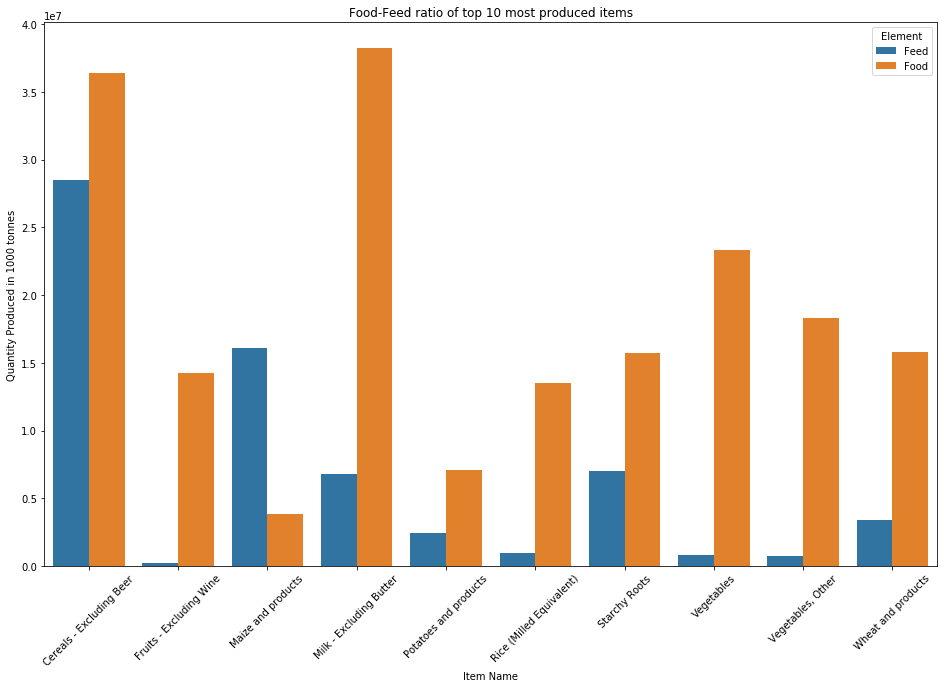

In [32]:
plt.figure(figsize=(16,10))
sns.barplot(x=Top10['Item'], y=Top10['Values'], hue = Top10['Element'], data=Top10)
plt.xlabel('Item Name')
plt.xticks(rotation=45)
plt.ylabel('Quantity Produced in 1000 tonnes')
plt.title('Food-Feed ratio of top 10 most produced items')
plt.show()

#### Cereals and maize are two products whose production was highly increased for livestock feed purpose from 1961-2013. Milk, another product that saw a high production increase is an animal derivative, which also suggests that number of livestock significantly increased in this time period. 

#### All other products that saw huge jumps in production from 1961-2013 are primarily for human food.

### 3.4 Analysing increase in production of all items since 1961

In [33]:
ItemPerYear.head(2)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Total Produce,Item_Rank
Item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,69924.0,72447.0,75105.0,77976.0,80127.0,83660.0,86095.0,89075.0,92729.0,97789.0,...,233310.0,244420.0,244373.0,243452.0,247414.0,256269.0,258895,260701,8242864.0,12
Animal fats,10359.0,10929.0,11116.0,11361.0,11469.0,11508.0,11974.0,12325.0,12263.0,12312.0,...,23314.0,23807.0,23818.0,23900.0,24267.0,24604.0,25137,25186,906973.0,43


In [34]:
#Resetting index
item_df = ItemPerYear.reset_index()

#Dropping all columns other than years from item_df
item_df.drop(['Item', 'Total Produce', 'Item_Rank'], axis=1, inplace=True)

In [35]:
item_df.head(2)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,69924.0,72447.0,75105.0,77976.0,80127.0,83660.0,86095.0,89075.0,92729.0,97789.0,...,217392.0,222722.0,233310.0,244420.0,244373.0,243452.0,247414.0,256269.0,258895,260701
1,10359.0,10929.0,11116.0,11361.0,11469.0,11508.0,11974.0,12325.0,12263.0,12312.0,...,22781.0,22641.0,23314.0,23807.0,23818.0,23900.0,24267.0,24604.0,25137,25186


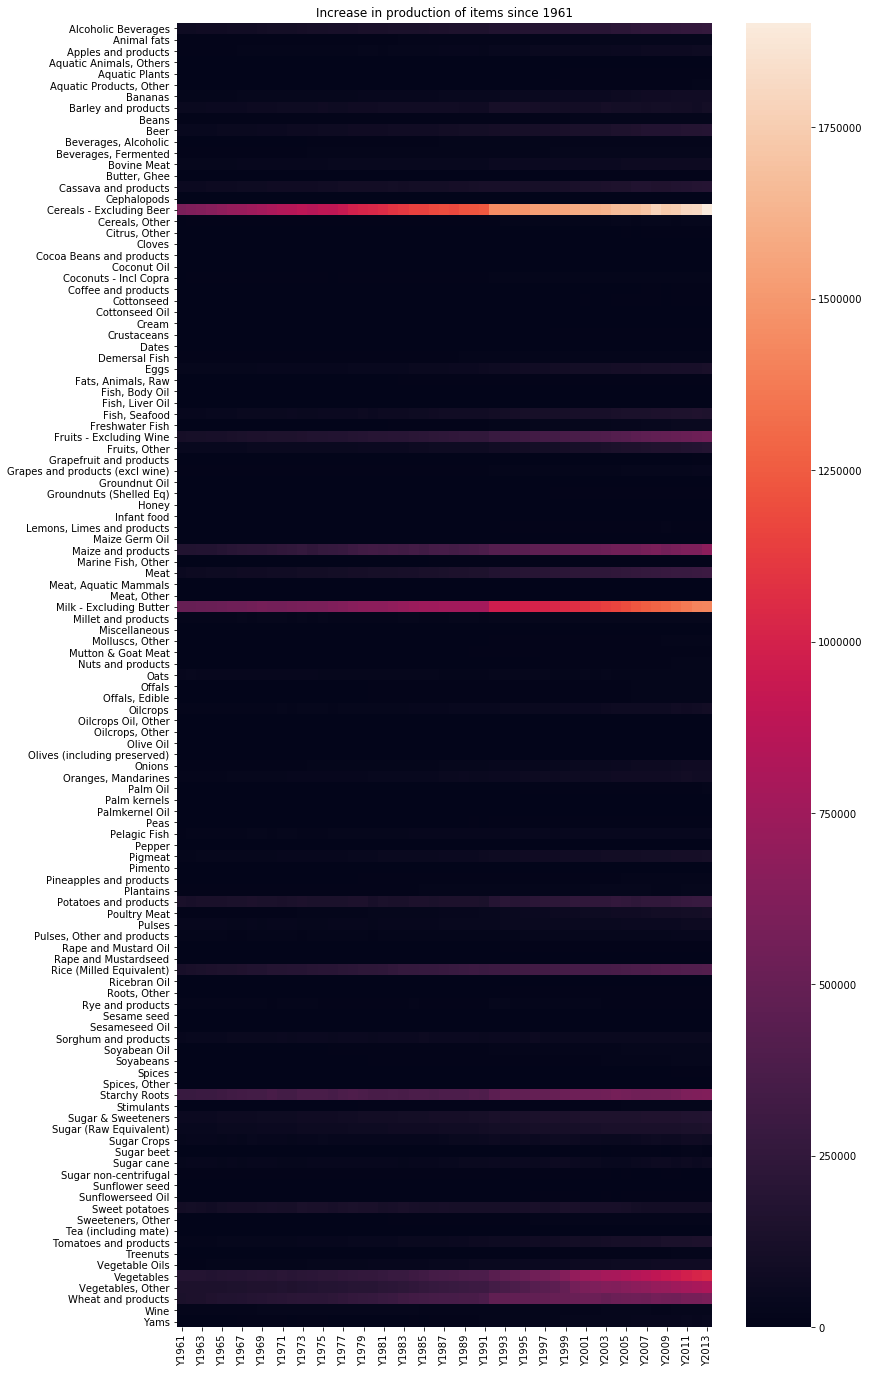

In [36]:
plt.figure(figsize=(12,24))
ax = sns.heatmap(item_df)
ax.set_yticklabels(ItemPerYear.index.values)
plt.title('Increase in production of items since 1961')
plt.show()

#### As we can see, items of Cereals - Excluding Beer, Milk - Excluding Butter', 'Vegetables' are some items that have seen a significant increase in production over the years. These are very similar to most produced items, let's analyse this.

### 3.5 Comparing lists of top 10 most produced items and top 10 items that have seen maximum increase in production

In [37]:
# Creating a new column containing 1961 produce subtracted from 2013 produce

ItemPerYear['2013-1961 Produce'] = ItemPerYear['Y2013']-ItemPerYear['Y1961']
ItemPerYear.head(2)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Total Produce,Item_Rank,2013-1961 Produce
Item,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverages,69924.0,72447.0,75105.0,77976.0,80127.0,83660.0,86095.0,89075.0,92729.0,97789.0,...,244420.0,244373.0,243452.0,247414.0,256269.0,258895,260701,8242864.0,12,190777.0
Animal fats,10359.0,10929.0,11116.0,11361.0,11469.0,11508.0,11974.0,12325.0,12263.0,12312.0,...,23807.0,23818.0,23900.0,24267.0,24604.0,25137,25186,906973.0,43,14827.0


In [38]:
# Assigning ranks to Items based on '2013-1961 Produce' column and sorting based on rank

ItemPerYear['ProdIncrease_Rank'] = ItemPerYear['2013-1961 Produce'].rank(ascending=False).astype(int)
ItemPerYear = ItemPerYear.sort_values(by='ProdIncrease_Rank').head(10)
ItemPerYear.index

Index(['Cereals - Excluding Beer', 'Milk - Excluding Butter', 'Vegetables',
       'Vegetables, Other', 'Maize and products', 'Wheat and products',
       'Fruits - Excluding Wine', 'Starchy Roots', 'Rice (Milled Equivalent)',
       'Meat'],
      dtype='object', name='Item')

| Top 10 Most Produced Items         | Top 10 Items that saw most increase in Production|
|------------------------------------|-----------------------------------|
| 'Cereals - Excluding Beer'         | 'Cereals - Excluding Beer'        |
| 'Milk - Excluding Butter'          | 'Milk - Excluding Butter'         |
| 'Vegetables'                       | 'Vegetables'                      |
| 'Starchy Roots'                    | 'Vegetables                       |
| 'Maize and products'               | 'Other'                           |
| 'Wheat and products'               | 'Maize and products'              |
| 'Vegetables'                       | 'Wheat and products'              |
| 'Other'                            | 'Fruits - Excluding Wine'         |
| 'Rice (Milled Equivalent)'         | 'Starchy Roots'                   |
| 'Fruits - Excluding Wine'          | 'Rice (Milled Equivalent)'        |
| 'Potatoes and products'            | 'Meat'                            |

#### Above is the list of top 10 most produced items on the left, and top 10 items which saw most increase in production on the right. The top 3 products in both lists are the same, and all the other items are also repeating but at different positions.

### 3.6 Checking if increase in production of top 10 items is due to increase in feed or food.

In [39]:
TopIncreaseItemElem = df.groupby(by = ['Item','Element']).sum()
TopIncreaseItemElem.reset_index(inplace=True)
TopIncreaseItemElem = TopIncreaseItemElem.loc[TopIncreaseItemElem['Item'].isin(Top10FoodItemslist)]
TopIncreaseItemElem.head(2)

,Item,Element,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
27,Cereals - Excluding Beer,Feed,21753,502565,955133,3365.16,2699.72,253905.0,260940.0,269992.0,...,750500.0,745239.0,736469.0,754025.0,811491.0,764011.0,758205.0,801196.0,795691,873552
28,Cereals - Excluding Beer,Food,21825,505470,894708,3376.99,2742.31,334989.0,350885.0,360495.0,...,919231.0,928890.0,942238.0,952219.0,967413.0,973744.0,992593.0,1003292.0,1012534,1029017


In [40]:
# Adding a new column to above df

TopIncreaseItemElem['2013-1961 Produce'] = TopIncreaseItemElem['Y2013'] - TopIncreaseItemElem['Y1961']
TopIncreaseItemElem = TopIncreaseItemElem[['Item', 'Element', '2013-1961 Produce']]
TopIncreaseItemElem.head(2)

,Item,Element,2013-1961 Produce
27,Cereals - Excluding Beer,Feed,619647.0
28,Cereals - Excluding Beer,Food,694028.0


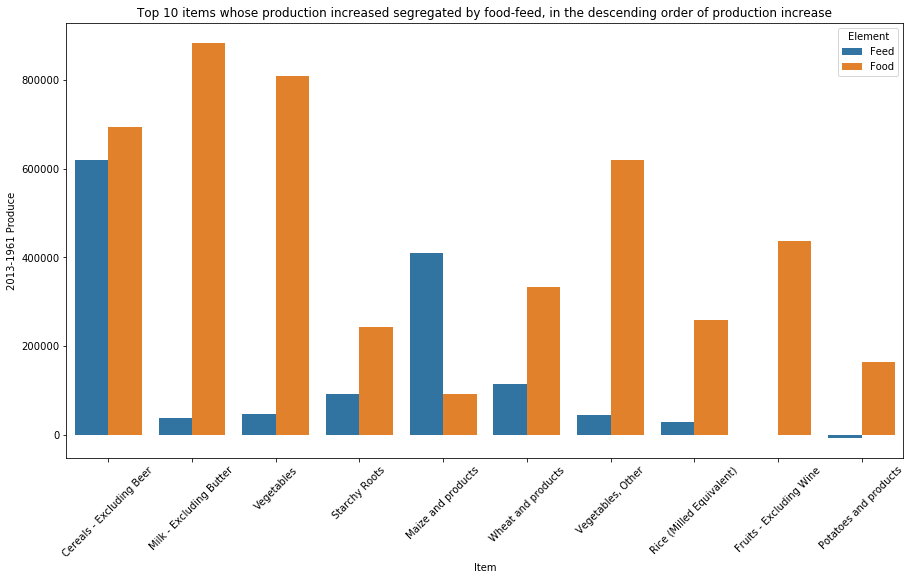

In [41]:
# Plot of the top 10 items whose production increased segregated by food-feed, in the descending order of production increase

plt.figure(figsize=(15,8))
sns.barplot(x=TopIncreaseItemElem['Item'],
            y=TopIncreaseItemElem['2013-1961 Produce'],
            hue=TopIncreaseItemElem['Element'],
            order = Top10FoodItemslist,
            data = TopIncreaseItemElem)
plt.xticks(rotation=45)
plt.title('Top 10 items whose production increased segregated by food-feed, in the descending order of production increase')
plt.show()

#### Production of Cereals increased almost equally for food and feed. Maize and Products saw increase in production primarily for being used as feed. Animal products like Meat and Milk also saw a lot of increase in food, which ties back with all the increase in feed production.

#### Since feed production increased, production of animal derivates like meat and milk also increased.

## 4. Clustering

### 4.1 Determining optimal number of clusters by Elbow Method

In [42]:
# Dataset that will be used, we will be clustering by country
countries= countriesyears.copy()
countries.head(2)

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007
1,Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271


In [43]:
X = countries.drop('Area', axis=1)
X.head(2)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007
1,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271


[216926427689304.75, 51726206115557.37, 21940339445498.36, 7659917977375.744, 5527426537369.569, 4374963071044.569, 3266820937391.485, 2259021339020.029, 1737238136827.972, 1289393700006.4053]


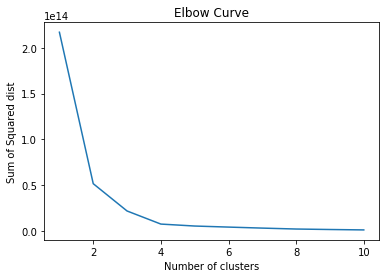

In [44]:
# Elbow curve
from sklearn.cluster import KMeans

range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
ssd=[]

for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i, max_iter = 100)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

print(ssd)

# Plot SSD

plt.title('Elbow Curve')
sns.lineplot(y=ssd, x=range_n_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared dist')
plt.show()

#### I will take 2 clusters since elbow is coming at n=2.

In [45]:
#Creating two clusters on the dataset
kmeans = KMeans(n_clusters=2, max_iter=300)

#Fitting the clusters on the dataset
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
# Checking labels assigned to clusters
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# Assiging the labels to each country

countries['clusterid'] = kmeans.labels_
countries.head(2)

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,clusterid
0,Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,...,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007,0
1,Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,...,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271,0


In [48]:
countriesplot = countries.drop('Area', axis=1)
countriesplot = countriesplot.melt(id_vars='clusterid')
countriesplot.tail()

,clusterid,variable,value
9217,0,Y2013,45462.0
9218,0,Y2013,128111.0
9219,0,Y2013,18745.0
9220,0,Y2013,10996.0
9221,0,Y2013,9786.0


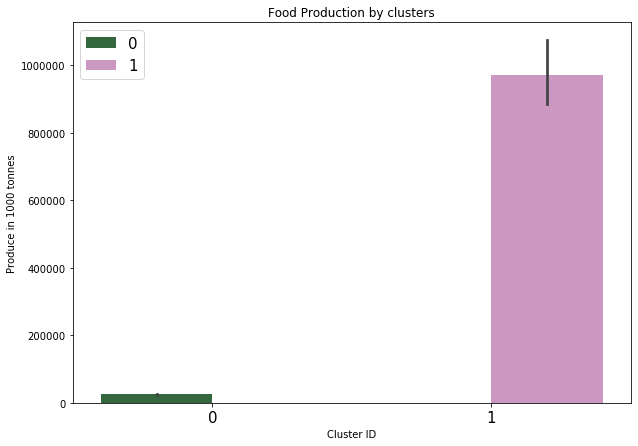

In [49]:
plt.figure(figsize=(10,7))
ax = sns.barplot(y='value',x='clusterid', hue ='clusterid', palette='cubehelix', data=countriesplot)
plt.ylabel('Produce in 1000 tonnes')
plt.xlabel('Cluster ID')
plt.title('Food Production by clusters')
plt.xticks(fontsize='15')
plt.legend(fontsize='15')
plt.show()

#### The production of countries in cluster 1 is much higher than that in cluster 0. Checking which countries are in cluster 1.

In [50]:
countries.loc[countries['clusterid'] == 1].Area

35              China, mainland
73                        India
165    United States of America
Name: Area, dtype: object

#### China, India and USA combined far outweigh the production of all the other countries put together. Thus they have been clustered seperately.

### Some important insights gained:

#### 1. Worldwide production of Food for humans increased by 272% from 1961-2013, whereas that of Feed for livestock increased by 195% in the same period. Thus, Production of Food for humans increased much more than Feed for animals from 1961-2013. 

#### 2. Out of the ten items that saw the higest increase in production from 1961-2013, two are cereals and maize, which increased significantly for livestock feed purpose, especially maize. We also saw a huge increase in production on milk products, which is an animal derivative, suggesting that number of livestock greatly increased in this time period too.

#### 3. The countries that saw highest increase in production of food-feed were China, India and USA.<br>
    3.1 China is the largest producer of several grains and vegetables like maize, rice, wheat, potatoes, etc. due to this increase.
    3.2 India is the largest producer of sugarcane and milk, and second producer in many of the categories that China is top. It is also the largest exporter of beef.
    3.3 USA increase in food-feed production did not occur at the same pace as China's and India's. Thus, it was overtaken in many of the categories where it held top spot for production.

#### 4. Milk products and meat are two of the ten top produced items, suggesting that livestock feed production was increased to support increase in demand of animal products. Though animal product demand increased, the primary food for most of the world population remained plants, marked by increased production of cereals for humans, vegetables, grains and fruits.


### In conclusion, production of food for humans increased much more than feed for animals from 1961-2013. The increase in feed production was for supporting increased demand for animal products.